### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from scipy import stats
from neuropy.utils import signal_process
from neuropy.analyses import oscillations
from neuropy import plotting
import subjects

### High voltage spindles and theta relationship

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import subjects
import scipy.signal as sg

sessions = subjects.nsd.ratUday2


In [ ]:
from scipy import stats

for sub, sess in enumerate(sessions):
    maze = sess.paradigm["maze"]
    channels = sess.recinfo.channel_groups[6]
    sig = sess.eegfile.get_signal(channels.astype("int"), maze[0], maze[1])
    traces = stats.zscore(sig.traces, axis=-1)
    f, pxx = sg.welch(
        traces, fs=sig.sampling_rate, nperseg=6 * 1250, noverlap=3 * 1250, axis=1
    )


In [ ]:
from matplotlib import cm

cmap = cm.get_cmap('Reds')
colors = [cmap(_/16) for _ in range(len(channels))] 
_,ax = plt.subplots()

for p,color in zip(pxx,colors):
    ax.plot(f,p/np.sum(p),color=color)
    
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([2, 60])
ax.set_ylim([1e-4, 1e-1])



### Wavelet visualization of HVS epochs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import subjects
import scipy.signal as sg
from neuropy.utils import signal_process
from scipy import stats

sessions = subjects.nsd.ratUday2

In [ ]:
from neuropy.utils.signal_process import TimeFrequency


for sub, sess in enumerate(sessions):
    maze = sess.paradigm["maze"]
    signal = sess.eegfile.get_signal(107,maze[0],maze[1])
    freqs = np.arange(1, 20, 0.5)
    tfr = TimeFrequency(signal=signal,freqs=freqs,method='wavelet',n_cpu=6)

In [ ]:
%matplotlib widget
from neuropy.plotting import plot_epochs
from scipy.ndimage import gaussian_filter1d
from neuropy.utils import mathutil
from neuropy.core import Epoch

smth_wavlet = gaussian_filter1d(theta_wvlt_power,20)
smth_wavlet = stats.zscore(smth_wavlet)
periods = mathutil.threshPeriods(smth_wavlet,lowthresh=1,highthresh=3,minDistance=0.6*1250,minDuration=1*1250)
periods = periods/1250 + signal.t_start

epochs = Epoch.from_array(periods[:,0],periods[:,1])
# hil_amp = np.abs(signal_process.hilbertfast(smth_wavlet))
_, ax = plt.subplots()
ax.plot(sess.lin_maze.time, sess.lin_maze.x/10)
ax.plot(signal.time[::2],smth_wavlet[::2],'r')
plot_epochs(epochs=epochs,ax=ax,colors='k',alpha=0.1)

In [ ]:
%matplotlib widget
from neuropy import plotting as nplot

figure = nplot.Fig()
fig,gs = figure.draw(grid=(2,4))

# ep_indx = np.random.choice(len(epochs),2,replace=False)
ep_indx = [1,2]
print(ep_indx)
channels = sess.recinfo.channel_groups[6].astype('int')
for i,indx in enumerate(ep_indx):
    # ep = epochs[indx].squeeze()
    ep = [10000,10005]
    sig = sess.eegfile.get_signal(channels,ep[0]-0.5,ep[1]+0.5)
    ax = plt.subplot(gs[0,2*i:2*i+2])
    nplot.plot_signal_traces(sig,ax=ax,pad=0.8)

    tfr_ep = tfr.time_slice(ep[0]-0.5,ep[1]+0.5)
    ax = plt.subplot(gs[1,2*i:2*i+2])
    nplot.plot_signal_heatmap(tfr_ep,ax=ax)



### Spindles during SD

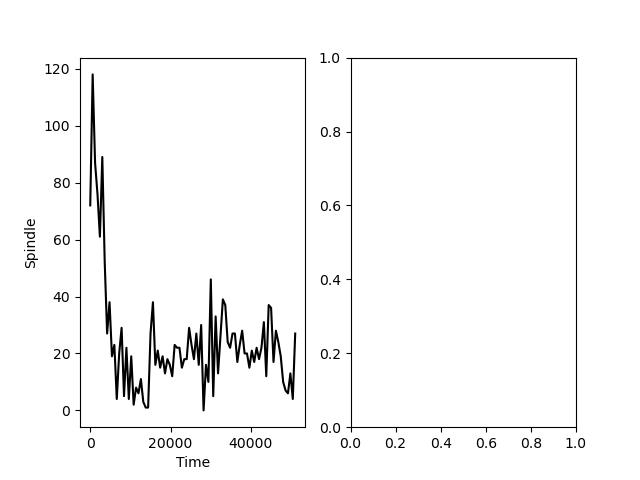

In [9]:
sessions = subjects.sd.ratSday3

_,axs = plt.subplots(1,2)
for sub, sess in enumerate(sessions):
    ax = axs[sub]
    starts = sess.spindle.starts
    bins = np.arange(0,sess.eegfile.duration,600)
    hist_spindles = np.histogram(starts,bins=bins)[0] 
    # plotting.plot_epochs(ax,sess.paradigm)
    ax.plot(bins[:-1],hist_spindles,'k')
    ax.set_xlabel('Time')
    ax.set_ylabel('Spindle')

